# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Profissao- Cientista de Dados_M10_support material.csv")
df = df.drop(['Unnamed: 0', 'index', 'mau'], axis=1)
df

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14996,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14997,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,1586.85
14998,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


In [3]:
df_quali = df[['posse_de_imovel', 'posse_de_veiculo',
               'data_ref', 'tipo_renda', 'educacao',
               'estado_civil', 'tipo_residencia']]
df_quali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   posse_de_imovel   15000 non-null  bool  
 1   posse_de_veiculo  15000 non-null  bool  
 2   data_ref          15000 non-null  object
 3   tipo_renda        15000 non-null  object
 4   educacao          15000 non-null  object
 5   estado_civil      15000 non-null  object
 6   tipo_residencia   15000 non-null  object
dtypes: bool(2), object(5)
memory usage: 615.4+ KB


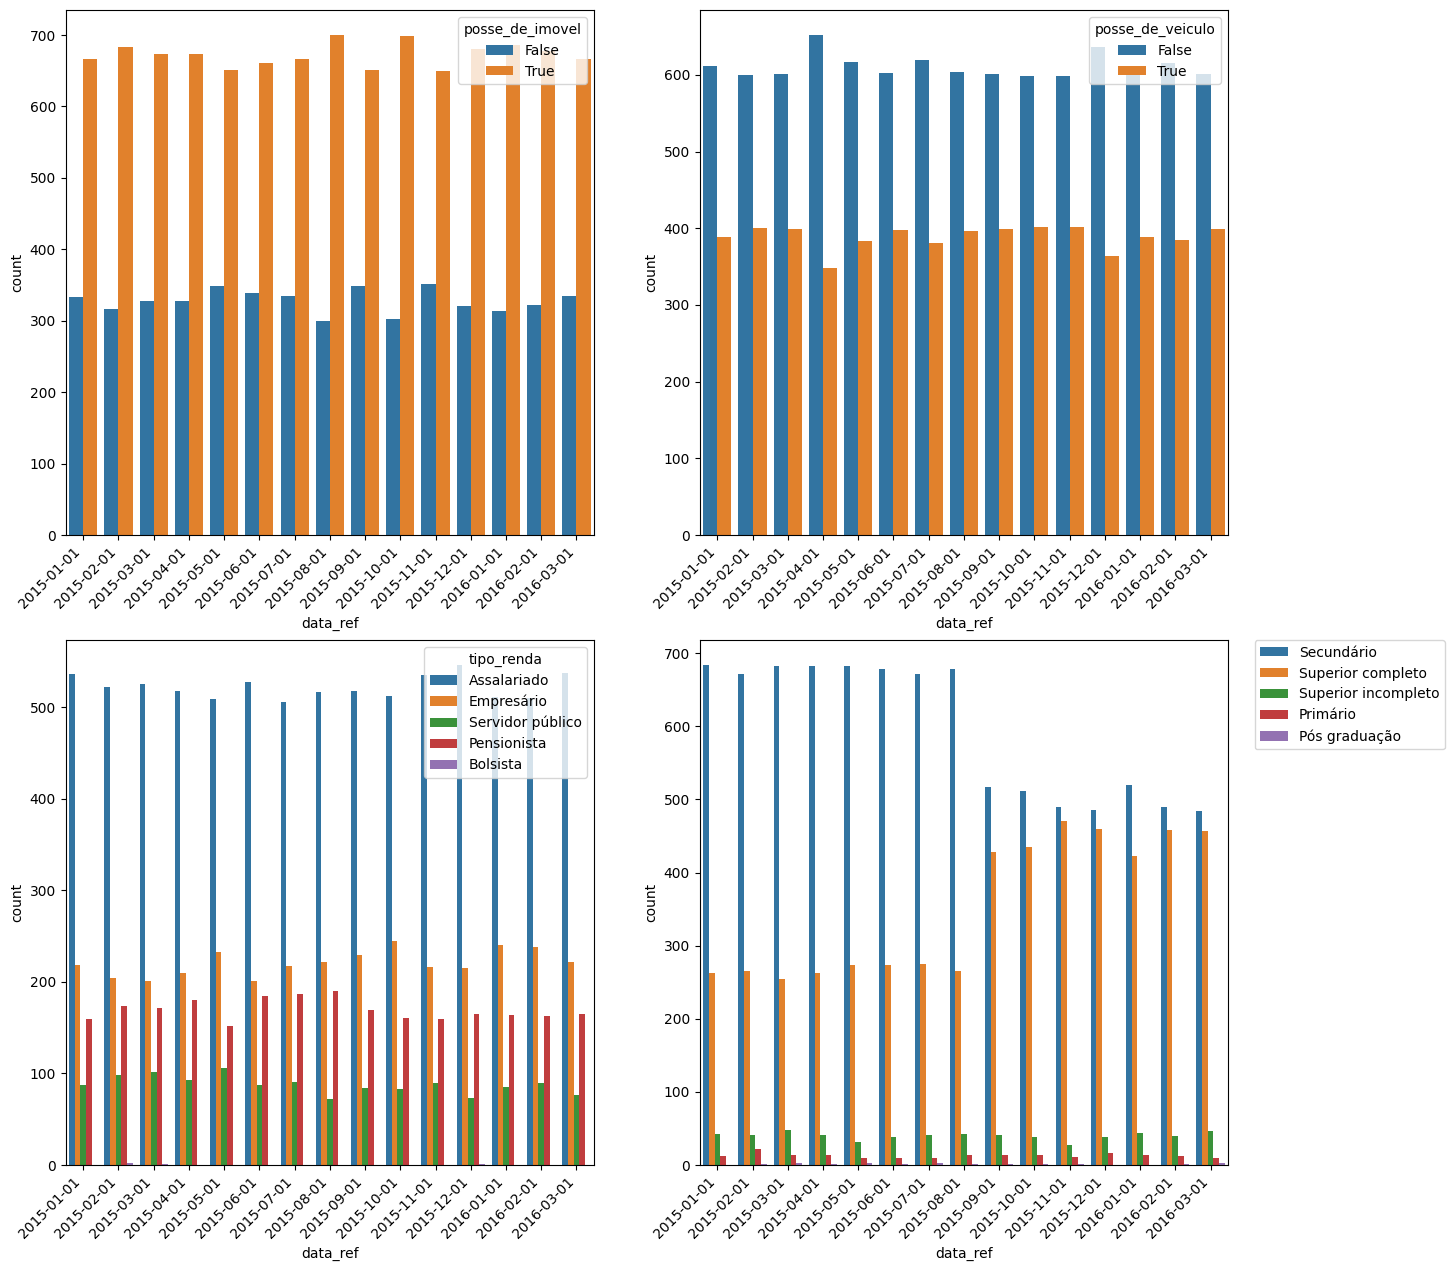

In [4]:
plt.rc('figure', figsize=(15,15))
fig, axes = plt.subplots(2,2)

sns.countplot(ax = axes[0, 0], x='data_ref',  hue = 'posse_de_imovel', data=df_quali)
sns.countplot(ax = axes[0, 1], x='data_ref',  hue = 'posse_de_veiculo', data=df_quali)
sns.countplot(ax = axes[1, 0], x='data_ref',  hue = 'tipo_renda', data=df_quali)
sns.countplot(ax = axes[1, 1], x='data_ref',  hue = 'educacao', data=df_quali)

for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

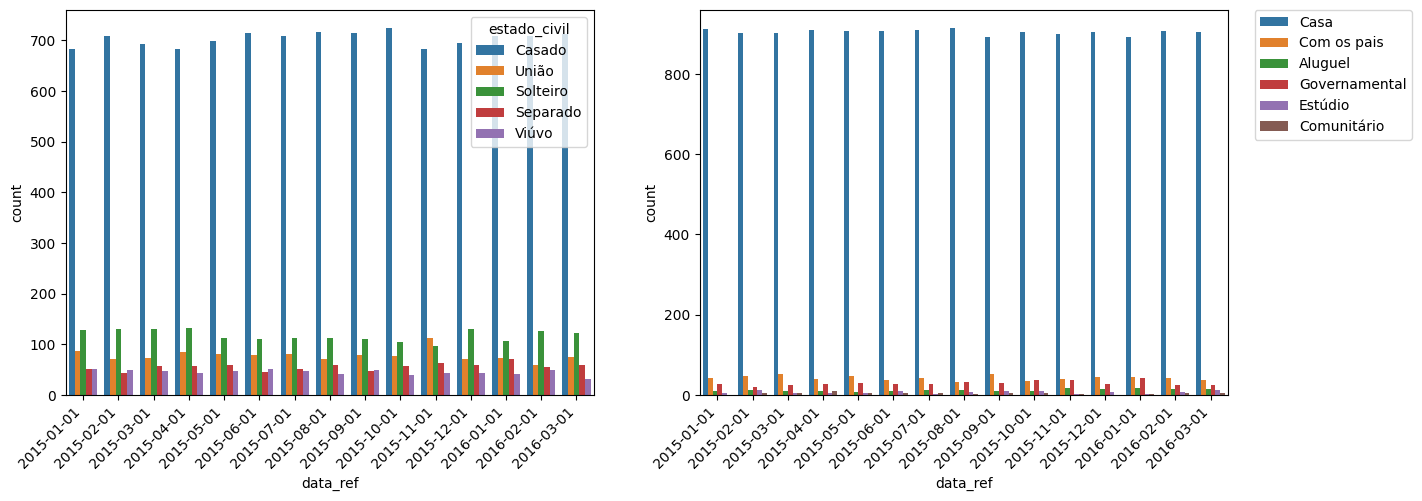

In [5]:
plt.close('all')
plt.rc('figure', figsize=(15,5))
fig, axes = plt.subplots(1,2)

sns.countplot(ax = axes[0], x='data_ref',  hue = 'estado_civil', data=df_quali)
sns.countplot(ax = axes[1], x='data_ref',  hue = 'tipo_residencia', data=df_quali),

for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Uma alteração significativa aconteceu no gráfico do tipo de educação. Percebe-se uma mudança drástica a partir de setembro de 2015, no qual a educação secundária despenca, e o número de superior completo aumentam e ambos se mantem depois com o tempo.

2) Para cada variável quantitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [6]:
df_quant = df[['qtd_filhos', 'idade', 'tempo_emprego',
               "qt_pessoas_residencia", 'renda', 'data_ref']]

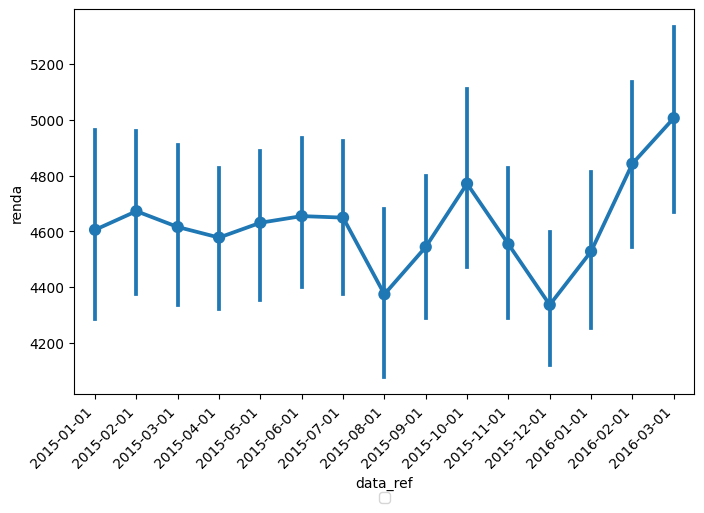

In [11]:
plt.rc('figure', figsize=(8,5))

ax = sns.pointplot(x="data_ref", y = 'renda',
                   data=df_quant, dodge=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

<ipython-input-12-70f4e47ad346>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(ax = axes[0, 0], x="data_ref", y = 'qtd_filhos',
<ipython-input-12-70f4e47ad346>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(ax = axes[0, 1], x="data_ref", y = 'idade',
<ipython-input-12-70f4e47ad346>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(ax = axes[1, 0], x="data_ref", y = 'tempo_emprego',
<ipython-input-12-70f4e47ad346>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(ax = axes[1, 1], x="data_ref", y = "qt_pessoas_residencia",


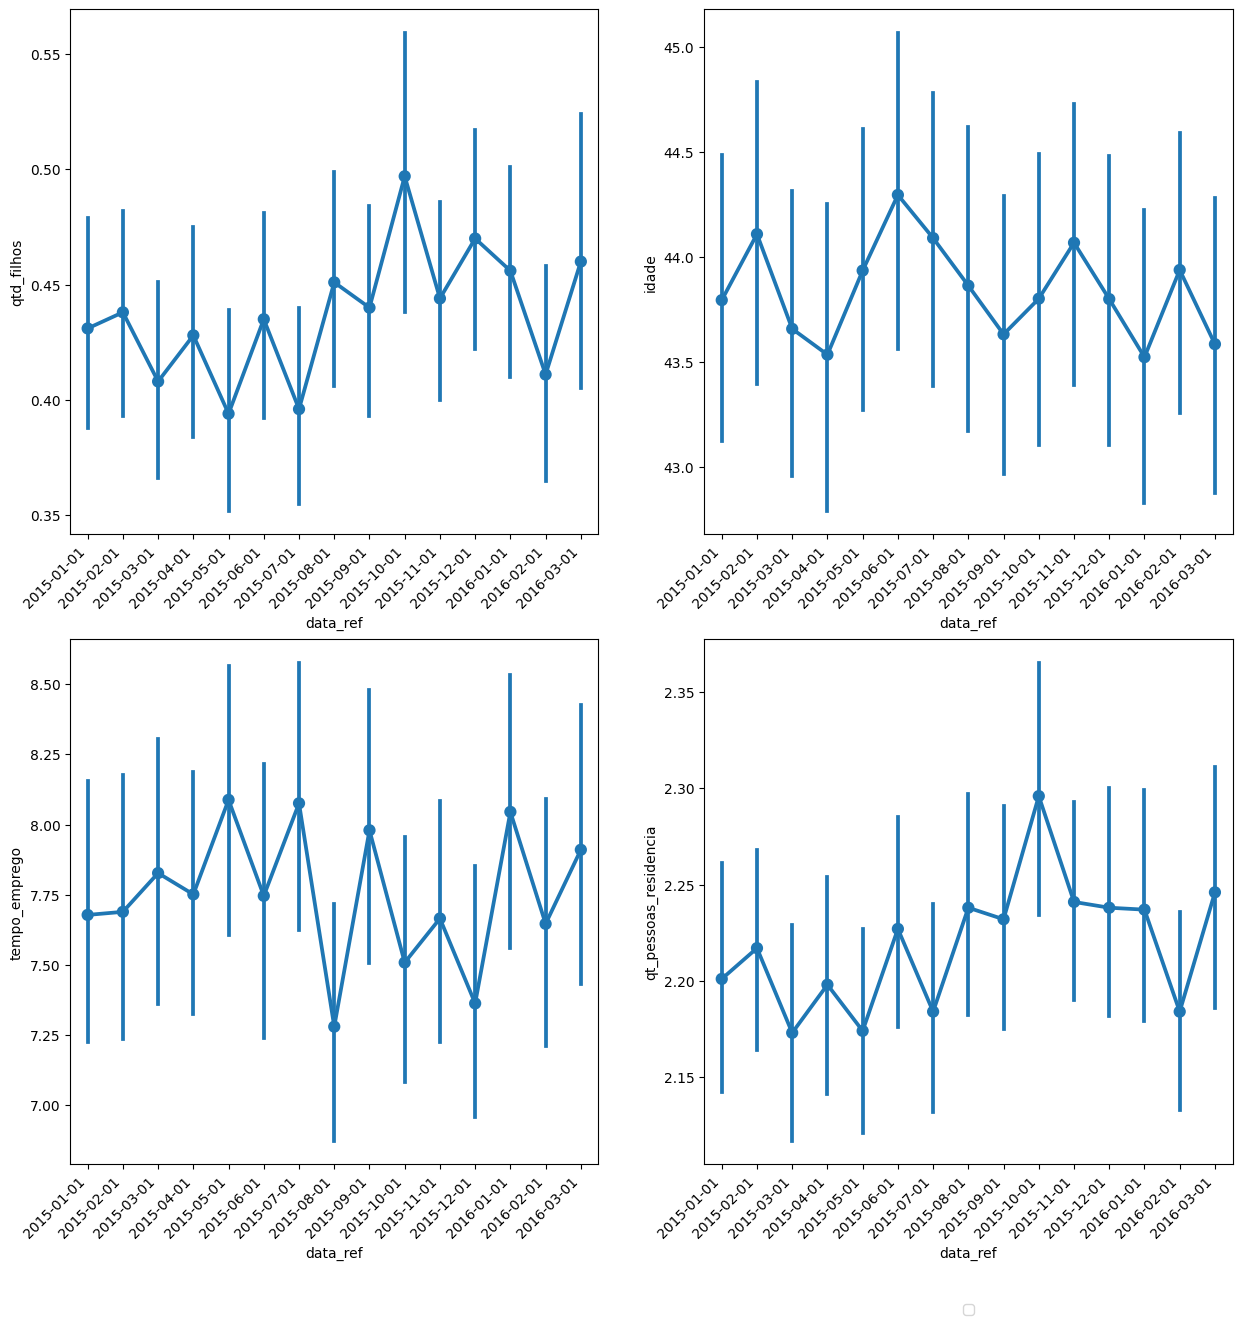

In [12]:
plt.rc('figure', figsize=(15,15))
fig, axes = plt.subplots(2,2)

sns.pointplot(ax = axes[0, 0], x="data_ref", y = 'qtd_filhos',
              data=df_quant, dodge=True, ci = 95)
sns.pointplot(ax = axes[0, 1], x="data_ref", y = 'idade',
              data=df_quant, dodge=True, ci = 95)
sns.pointplot(ax = axes[1, 0], x="data_ref", y = 'tempo_emprego',
              data=df_quant, dodge=True, ci = 95)
sns.pointplot(ax = axes[1, 1], x="data_ref", y = "qt_pessoas_residencia",
              data=df_quant, dodge=True, ci = 95)

for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

No gráfico de renda, teve uma alteração considerável a partir de 01/08/2015, saindo de uma média de 4600 de renda, com uma descida, depois subida de novo, desceu e acelerou até renda de 5000.

A média de quantidade de filhos na mesma data, começou a ficar maior com passar do tempo.

Idade possui oscilações mas nada significante até o momento, com subidas e descidas a cada 2 meses mais ou menos.

Tempo de emprego teve tendência em ter médias mais baixas a partir do 01/08/2015 também, porém alguns meses obteve números maiores, iguais a antes desse período.

E sobre quantidade de pessoas por residência, a partir do dia 01/08/2015 as médias começaram a ser maiores que o normal.


Acho que para uma modelagem, a partir dessa análise, precisaria ter alguns ajustes ou análisar através de outras possibilidades, pois existem muitas inconsistências.